In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [ ]:
df.head()

In [4]:
df.shape

(858, 36)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [7]:
df = df.replace("?", np.nan)

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.isnull())
plt.show()

In [14]:
df = df.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], axis=1)

In [15]:
df = df.apply(pd.to_numeric)

In [17]:
df = df.fillna(df.mean())

In [ ]:
df.hist(bins=10, figsize=(15, 15))

In [ ]:
df.info()

In [21]:
df = df.astype("float")

In [ ]:
df.info()

In [23]:
X = df.drop("Biopsy", axis=1)
y = df["Biopsy"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [28]:
X_train.shape, y_train.shape

((686, 33), (686,))

In [29]:
X_test.shape, y_test.shape

((172, 33), (172,))

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=50)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
y_pred = xgb_model.predict(X_test)

In [36]:
accuracy_score(y_pred, y_test)

0.9709302325581395

In [37]:
cm = confusion_matrix(y_pred, y_test)

<Axes: >

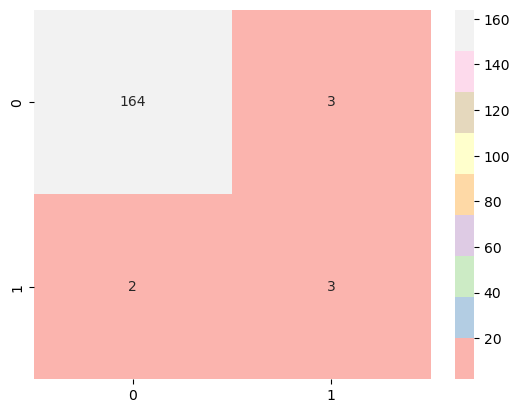

In [43]:
sns.heatmap(cm, annot=True, cmap="Pastel1", fmt=".0f")

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       166
         1.0       0.60      0.50      0.55         6

    accuracy                           0.97       172
   macro avg       0.79      0.74      0.77       172
weighted avg       0.97      0.97      0.97       172

